In [2]:
import matplotlib.pyplot as plt
import numpy as np

###  №5
Consider a 2-dimensional vector space $r = (x,y)$ and plot the unit disk $\|x \|_p \leq 1$ for $p = 1, 2, 3;$

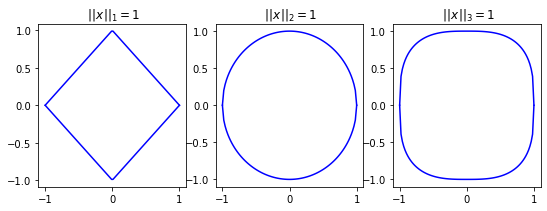

In [116]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (9, 3))
x = np.linspace(-1, 1, 100)
for i, p in enumerate([1, 2, 3]):
  y1 = (1 - np.abs(x)**p)**(1/p)
  y2 = -(1 - np.abs(x)**p)**(1/p)
  ax[i].plot(x, y1, x, y2, c = 'blue')
  ax[i].set_title(f' $\||x \||_{p} = 1$')


###  №8


In [115]:
n = 10**8
##  pre-allocating numpy array
def Conway_numpy():
  values = np.zeros(n, dtype = int)
  values[0] = 1.0
  values[1] = 1.0
  for i in range(2, n):
    values[i] = values[values[i-1]] + values[i - values[i-1]] 

##  python list
def Conway_list():
  values = list()
  values.append(1)
  values.append(1)
  for i in range(2, n):
    values.append(values[values[i-1]] + values[i - values[i-1]])
  values = np.array(values)

##  JIT
from numba import jit

@jit(nopython=True)
def Conway_numba():
  values = np.zeros(n)
  values[0] = 1
  values[1] = 1
  for i in range(2, n):
    values[i] = values[int(values[i-1])] + values[int(i - values[i-1])] 


%timeit -n 1 Conway_numpy()
%timeit -n 2 Conway_list()
%timeit -n 3 Conway_numba()

1min 24s ± 526 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
38.2 s ± 1.83 s per loop (mean ± std. dev. of 7 runs, 2 loops each)
1.14 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)
